# Localizando Terras Indígenas no Estado do Mato Grosso.

Este jupyter notebook tem como objetivo somente colocar em prática alguns dos conhecimentos em análise exploratória de dados geográficos que adquiri nos últimos tempos.

* Importando bibliotecas

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Incluindo Shapefile com os estados do Brasil. 
* Fonte: <a href="https://geoservicos.ibge.gov.br/geoserver/ows?version=1.3.0">Geoserver IBGE</a>, camada: CGEO:UF_2013

In [4]:
# Lendo GeoDataFrame estados.
estados = gpd.read_file("estados/estados.shp")

In [5]:
# Verificando tipo do arquivo criado.
type(estados)

geopandas.geodataframe.GeoDataFrame

* Para realizar operações com arquivos shapefiles diferentes utilizando GeoPandas é necessário que os arquivos estejam no mesmo sistema de projeção geográfica, caso contrário, é necessário fazer a conversão.

In [6]:
# Verificando o sistema de coordenadas do arquivo
print(estados.crs)

epsg:4674


Como podemos verificar, o EPSG do arquivo é 4674, Sirgas 2000

In [7]:
# Apresentando as cinco primeiras linhas do DataFrame.
estados.head()

,uf,nome_uf,sigla_uf,grandreg,geometry
0,11.0,Rondônia,RO,Norte,"POLYGON ((-63.38701 -7.97659, -63.11838 -7.977..."
1,12.0,Acre,AC,Norte,"POLYGON ((-73.18253 -7.33550, -73.12014 -7.358..."
2,13.0,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14.0,Roraima,RR,Norte,"POLYGON ((-60.17884 5.23017, -60.17245 5.22656..."
4,15.0,Pará,PA,Norte,"MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ..."


A coluna geometry é a coluna onde ficam as coordenadas do shapefile, no GeoDataFrame de estados elas podem ser do tipo Polygon ou Multipolygon. Quando uma terra indígena é formada por um ou mais polígonos, ela é do tipo Multipolígono.

* Selecionando o estado do Mato Grosso.

In [8]:
# Filtrando estados pela sigla.
mt = estados[estados["sigla_uf"] == 'MT']

In [9]:
# Apresentando a linha contendo o resultado da seleção.
mt

,uf,nome_uf,sigla_uf,grandreg,geometry
22,51.0,Mato Grosso,MT,Centro-Oeste,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


* Plotando o mapa do estado do Mato Grosso.

Text(0.5, 1.0, 'Estado do Mato Grosso')

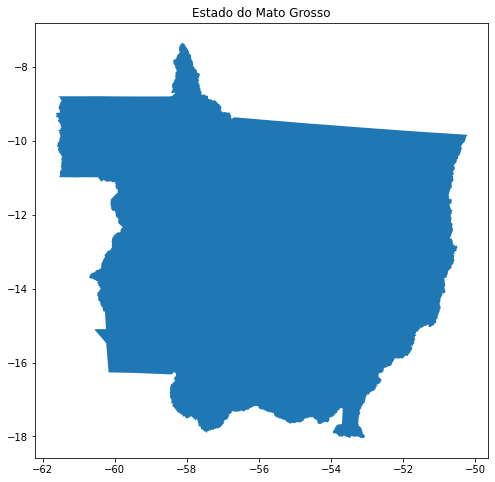

In [10]:
mt.plot(figsize=(15,8))
plt.title("Estado do Mato Grosso")

## Incluindo o GeoDataFrame com as Terras Indígenas.

* Fonte: <a href="http://geoserver.funai.gov.br">Geoserver Funai</a>, camada: ti_sirgas

In [11]:
# Carregando DataFrame.
terras_indigenas = gpd.read_file("ti_sirgas/ti_sirgas.shp")

In [12]:
# Verificando o sistema de projeção do arquivo.
print(terras_indigenas.crs)

epsg:4674


Podemos ver que o arquivo de terras indígenas também está no EPSG 4674, Sirgas 2000.

In [13]:
# Apresentando as cinco primeiras linhas do DataFrame de terras indígenas.
terras_indigenas.head()

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.9411,Declarada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,3.020200e+10,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-AS,f,"POLYGON ((-66.88359 -2.53752, -66.87457 -2.537..."
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.0340,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,"POLYGON ((-66.30929 -7.79995, -66.30929 -7.799..."
2,57,601,Aconã,Tingui-Botó,Traipu,AL,267.7862,Regularizada,Reserva Indígena,None,COORDENACAO REGIONAL NORDESTE I,Não,3.020200e+10,COORDENACAO REGIONAL NORDESTE I,CR-NE-I,t,"POLYGON ((-36.94514 -10.07113, -36.94377 -10.0..."
3,62,401,Água Preta/Inari,Apurinã,Pauini,AM,139763.6705,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,"POLYGON ((-67.29764 -7.33958, -67.29713 -7.338..."
4,3,501,Águas Belas,Pataxó,Prado,BA,1189.0649,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL SUL DA BAHIA,Não,3.020200e+10,COORDENACAO REGIONAL SUL DA BAHIA,CR-SBA,t,"POLYGON ((-39.30549 -16.90608, -39.30501 -16.9..."


* Filtrando as terras indigenas presentes no estado do Mato Grosso, algumas terras indígenas estão entre o Mato Grosso e o Amazonas, Pará e Rondônia.

In [14]:
# Aplicando seleção.
ti_mt = terras_indigenas.loc[(terras_indigenas["uf_sigla"] == "MT") | (terras_indigenas["uf_sigla"] == "MT,PA") 
                             | (terras_indigenas["uf_sigla"] == "PA,MT") |  (terras_indigenas["uf_sigla"] == "MT,RO") 
                             | (terras_indigenas["uf_sigla"] == "RO,MT")]

In [15]:
# Exibindo o resultado da seleção de terras indígenas no estado do Mato Grosso.
ti_mt.head()

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry
24,8,68301,Apiaká do Pontal e Isolados,"Isolados,Apiaká",Apiacás,MT,982324.0000,Delimitada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NORTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NORTE DO MATO GROSSO,CR-NMT,f,"POLYGON ((-58.32480 -7.97798, -58.32524 -7.973..."
25,7,2301,Apiaka/Kayabi,"Apiaká,Kaiabi",Juara,MT,109245.3822,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-57.23662 -10.81354, -57.23542 -10.8..."
39,29,3301,Arara do Rio Branco,Arara do Acre,"Aripuanã,Colniza",MT,114842.4748,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-59.39807 -9.77770, -59.39954 -9.778..."
44,69,3901,Areões,Xavante,Água Boa,MT,218515.0000,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,Não,3.020200e+10,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,CR-RC,t,"POLYGON ((-51.89056 -14.15934, -51.89049 -14.1..."
45,70,4201,Aripuanã,Cinta Larga,"Aripuanã,Juína",MT,750649.2650,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-60.12701 -10.10921, -60.12660 -10.1..."


* Plotando mapa com as terras indígenas no estado do Mato Grosso.

Text(0.5, 1.0, 'Terras Indígenas')

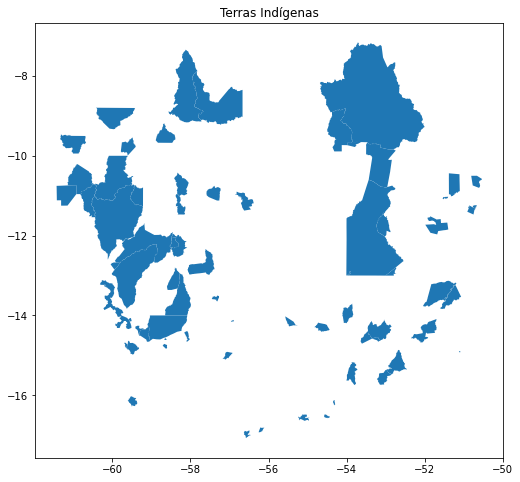

In [16]:
# Exibindo mapa das terras indígenas.
ti_mt.plot(figsize=(15,8))
plt.title("Terras Indígenas")

* Exibindo o mapa do estado do Matro Grosso contendo as suas respectivas terras indígenas.

Text(0.5, 1.0, 'Terras Indígenas no Estado do Mato Grosso')

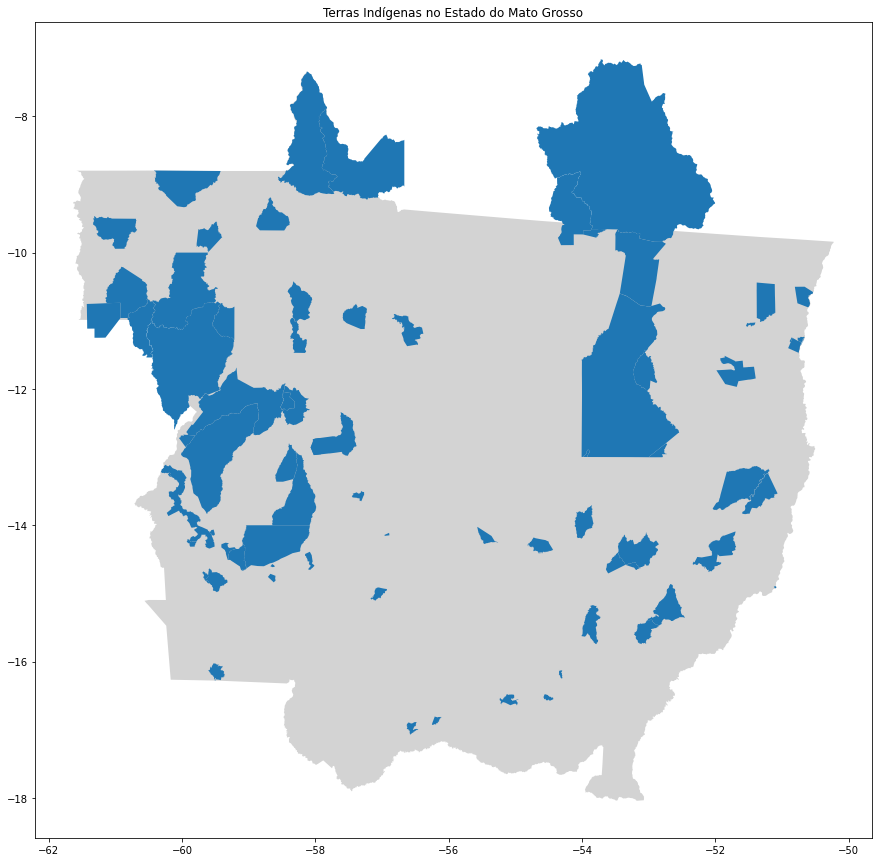

In [18]:
# Plotando o mapa do estado do Mato Grosso e as terras indígenas juntos.
fig, ax = plt.subplots(figsize = (15,15))
mt.plot(ax = ax, color = "lightgrey")
ti_mt.plot(ax = ax)
plt.title("Terras Indígenas no Estado do Mato Grosso")

## Próximos passos

Como próximos passos, pode-se verificar a quantidade de área do estado que é pertencente a terras indígenas, melhorar a apresentação do mapa e exportar o mapa em formato PDF.